In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
import time
import os

In [2]:
import cv2 as cv

In [38]:
mp_drawing=mp.solutions.drawing_utils
mp_holistic=mp.solutions.holistic
holistic=mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.6)

In [39]:
style1=mp_drawing.DrawingSpec((131,255,0),1,1)
style2=mp_drawing.DrawingSpec((255,221,0),1,1)

In [5]:
def mediapipe_process(image,model):
    image=cv.cvtColor(image,cv.COLOR_BGR2RGB)  # convert image from bgr to rgb
    results=model.process(image)    # process the image or give to model
    image=cv.cvtColor(image,cv.COLOR_RGB2BGR) # again convert rgb to bgr
    return image,results   #return the image and the results
    

In [6]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,style1,style2)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,style1,style2)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,style1,style2)
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,style1,style2)

In [7]:
cap=cv.VideoCapture(0)
while cap.isOpened():
    _,frame=cap.read()
    image,results=mediapipe_process(frame,holistic)
    draw_landmarks(image,results)
    if cv.waitKey(1)==27:
        cap.release()
        cv.destroyAllWindows()
        break

    cv.imshow("frame",image)



In [17]:
results.face_landmarks.landmark  #  we get list of landamrks
results.face_landmarks.landmark[0]  # we get the first landmark object

x: 0.5417942
y: 0.70010716
z: -0.025448533

In [65]:
face=np.array([[landmark.x,landmark.y,landmark.z] for landmark in results.face_landmarks.landmark]).flatten()  if results.face_landmarks else np.zeros(1404)

In [66]:
face.shape


(1404,)

In [69]:
pose=np.array([[landmark.x,landmark.y,landmark.z , landmark.visibility] for landmark in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [70]:
pose.shape,33*4

((132,), 132)

In [36]:
len(results.left_hand_landmarks.landmark)

21

In [38]:
results.left_hand_landmarks.landmark[0]

x: 0.76958835
y: 0.63348305
z: 2.7013255e-07

In [56]:
lh=np.array([[landmark.x,landmark.y,landmark.z] for landmark in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)

In [57]:
lh

array([ 7.69588351e-01,  6.33483052e-01,  2.70132546e-07,  6.98390722e-01,
        5.93119085e-01, -1.61111150e-02,  6.48746967e-01,  5.14213622e-01,
       -2.08378024e-02,  6.31027758e-01,  4.34459209e-01, -2.63571087e-02,
        6.28490269e-01,  3.70662779e-01, -3.13980430e-02,  6.86570883e-01,
        4.08099413e-01,  2.96997512e-03,  6.62723601e-01,  3.21024448e-01,
       -1.32737849e-02,  6.47231102e-01,  2.66576499e-01, -2.93239672e-02,
        6.35680676e-01,  2.18851924e-01, -4.17023003e-02,  7.25880146e-01,
        3.91054809e-01, -3.71778477e-03,  7.12408900e-01,  2.84705460e-01,
       -1.78524610e-02,  7.01466084e-01,  2.17522681e-01, -3.35482731e-02,
        6.92329586e-01,  1.61942691e-01, -4.48535495e-02,  7.65181482e-01,
        3.94818842e-01, -1.48388082e-02,  7.54871905e-01,  2.95593262e-01,
       -3.22471112e-02,  7.44168520e-01,  2.35549107e-01, -4.45502438e-02,
        7.33477473e-01,  1.85654715e-01, -5.27232215e-02,  8.07887375e-01,
        4.15152311e-01, -

In [54]:
rh=np.array([[landmark.x,landmark.y,landmark.z] for landmark in results.left_right_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)

In [55]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
'''
1. we can see if left hand or the right hand is not detected then the results.left/right_hand will throw error
   so we need to create a blank array same as the length of the total array
   without flattening we get an array of shape = (21,3) 21: each landmark,3: x,y,z of each landmark
   after flattening we get array of length 21*3=63 

   // same for right hand
   after flattening for right hand we get array of length 21*3=63

   to avoid the error we create and array of all zeros of length 63  by using np.zeros(63)

2. without flattening the pose landamrks array then shape is (33,4)
   hence after flattening we get a single array of 33*4=132 lenght array

   

3. using face landmarks we can detect 468 landmarks on the face
    before flattening shape of array is (468,3)
    after flattening we get length=468*3=1404

    create a blank array of all zeros

4. np.concatenate([a,b,c]) will merge a,b,c arrays in one single array
    after concatenating our arrays of pose lh rh and face we will get a single big array of length=468*3+33*4+2(21*3)=1662
    total features

5. our basic idea is that we will be collecting 30 frames per seconds which is 30fps and will be making predictions on those 
    30 frames values
    for one class we will have n videos  ===== n actual data points
        one video consists of 30 frames
        each frame has 1662 values
        total values we will collect to make 1 prediction will be 30*1662=49860

        so our input shape to our model will be (30,1662)
        oops thats too big isnt it?

6. np.save(filename,array) will save the array as file with a npy extension
    this is usefull to extract datapoints from each frame and store accordingly
'''

In [73]:
468*3+33*4+2*(21*3)

1662

In [77]:
30*1662

49860

In [71]:
a=np.arange(0,10)
b=np.arange(10,20)

np.concatenate([a,b])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [7]:
def extract_landmarks(results):
    face=np.array([[landmark.x,landmark.y,landmark.z] for landmark in results.face_landmarks.landmark]).flatten()  if results.face_landmarks else np.zeros(1404)
    pose=np.array([[landmark.x,landmark.y,landmark.z , landmark.visibility] for landmark in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    rh=np.array([[landmark.x,landmark.y,landmark.z] for landmark in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    lh=np.array([[landmark.x,landmark.y,landmark.z] for landmark in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)

    return np.concatenate([pose,face,lh,rh])

In [76]:
extract_landmarks(results).shape

(1662,)

In [78]:
# ###################################
        # Creating folders
####################################


In [8]:
data_dir='data'

In [9]:
actions=np.array(['hello','thanks','iloveyou','please','blank'])

In [10]:
no_of_videos=30  #will be n for isl
no_of_frames=30  # will be 30 only for isl

In [86]:
# create dirs
# for action in actions:
#     for i in range(no_of_videos):
#         try:
#             os.makedirs(os.path.join(data_dir,,str(i)))
#         except:
#             print('error')

In [88]:
# np.save('1',extract_landmarks(results))

In [10]:
# collect data
model=holistic

In [13]:
try:
    cap=cv.VideoCapture(0)
    for action in actions:  #  for each action
        print(action)
        for video in range(no_of_videos):  # for n videos
            for frame in range(no_of_frames):
                
    
                # read the frame from the camera/webcam
                _,framee=cap.read()
                image,results=mediapipe_process(framee,model)
                draw_landmarks(image,results)
                a=extract_landmarks(results)
    
                if frame==0:  # for the first frame
                    cv.putText(image,f'starting collection',(100,200),cv.FONT_HERSHEY_COMPLEX_SMALL,3,(0,0,255),1,cv.LINE_AA)
                    cv.putText(image,f'For {action}  Video {video} Frame {frame}',(120,32),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0),1,cv.LINE_AA)
                    cv.imshow('image',image)
                    cv.waitKey(4000)
                else:
                    cv.putText(image,f'For Video {action} {video} Frame {frame}',(120,32),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0),1,cv.LINE_AA)
                    cv.imshow('image',image)
    
                a_path=os.path.join(data_dir,action,str(video),str(frame))
                np.save(a_path,a)            
                if cv.waitKey(5)==27:
                    cap.release()
                    break
            
    
    cv.destroyAllWindows()
    cap.release()
except:
    print('error')

hello
thanks
iloveyou
please
blank


In [13]:
cap.release()

In [11]:
# collect data

In [12]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [11]:
label_map={label:num for num,label in enumerate(actions)}

In [12]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'please': 3, 'blank': 4}

In [15]:
# now we will take data

In [16]:
videos=[]
labels=[]

In [17]:
for action in actions:
    for video in range(no_of_videos):
        data_window=[]
        for frame in range(no_of_frames):
            path=os.path.join(data_dir,action,str(video),f'{frame}.npy')
            res=np.load(path)
            data_window.append(res)
        videos.append(data_window)
        labels.append(label_map[action])
            

In [18]:
videos=np.array(videos)

In [19]:
labels=np.array(labels)

In [20]:
videos.shape

(150, 30, 1662)

In [22]:
labels.shape

(150,)

In [21]:
'''
so we have 
150 videos where each video has 30 rows and 1662 colmns
150 labels
'''

'\nso we have \n150 videos where each video has 30 rows and 1662 colmns\n\n'

In [23]:
import pickle

In [24]:
f=open('labels.pickle','wb')

In [25]:
pickle.dump(labels,f)

In [26]:
f.close()

In [27]:
f=open('data_videos.pickle','wb')
pickle.dump(videos,f)
f.close()

In [28]:
# doing one hot encoding

In [31]:
y=to_categorical(labels).astype(int)

In [33]:
y.shape

(150, 5)

In [110]:
# split the data
x_train,x_test,y_train,y_test=train_test_split(videos,y,test_size=0.40)

In [35]:
x_train.shape,y_train.shape

((135, 30, 1662), (135, 5))

In [13]:
# prepare model
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import TensorBoard

In [37]:
tb_callback=TensorBoard(log_dir='log_dir')

In [43]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(64,return_sequences=True,activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 64)            33024     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 514565 (1.96 MB)
Trainable params: 51456

In [45]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [46]:
history=model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),callbacks=[tb_callback])

Epoch 1/500
5/5 [==============================] - 11s 444ms/step - loss: 1.8335 - categorical_accuracy: 0.2074 - val_loss: 1.6288 - val_categorical_accuracy: 0.1333
Epoch 2/500
5/5 [==============================] - 1s 170ms/step - loss: 1.7201 - categorical_accuracy: 0.2148 - val_loss: 1.7259 - val_categorical_accuracy: 0.1333
Epoch 3/500
5/5 [==============================] - 1s 193ms/step - loss: 3.3031 - categorical_accuracy: 0.2074 - val_loss: 1.9768 - val_categorical_accuracy: 0.2667
Epoch 4/500
5/5 [==============================] - 1s 175ms/step - loss: 1.8652 - categorical_accuracy: 0.1259 - val_loss: 1.8572 - val_categorical_accuracy: 0.0000e+00
Epoch 5/500
5/5 [==============================] - 1s 165ms/step - loss: 1.8356 - categorical_accuracy: 0.1926 - val_loss: 1.6618 - val_categorical_accuracy: 0.2000
Epoch 6/500
5/5 [==============================] - 1s 163ms/step - loss: 1.5903 - categorical_accuracy: 0.2148 - val_loss: 2.6467 - val_categorical_accuracy: 0.1333
Epoch

KeyboardInterrupt: 

In [82]:
len(history.history['categorical_accuracy'])

100

In [49]:
# evaluating

In [50]:
from tensorflow.math import confusion_matrix

In [51]:
from seaborn import heatmap

In [53]:
y_p=model.predict(x_test)

1/1 [==============================] - 0s 46ms/step


In [61]:
predictions=[np.argmax(i) for i in y_p]

In [62]:
predictions

[1, 2, 1, 1, 4, 1, 1, 0, 4, 2, 3, 4, 0, 3, 3]

In [63]:
actual=[np.argmax(i) for i in y_test]

In [64]:
actual

[1, 0, 4, 1, 4, 1, 1, 0, 4, 2, 2, 4, 0, 3, 3]

In [66]:
cm=confusion_matrix(actual,predictions)

<Axes: >

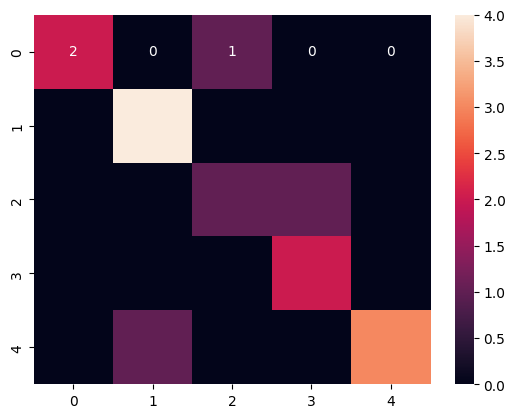

In [69]:
heatmap(cm,annot=True)

In [68]:
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[2, 0, 1, 0, 0],
       [0, 4, 0, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 0, 2, 0],
       [0, 1, 0, 0, 3]])>

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,multilabel_confusion_matrix

In [72]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.80      1.00      0.89         4
           2       0.50      0.50      0.50         2
           3       0.67      1.00      0.80         2
           4       1.00      0.75      0.86         4

    accuracy                           0.80        15
   macro avg       0.79      0.78      0.77        15
weighted avg       0.84      0.80      0.80        15



In [74]:
cm=multilabel_confusion_matrix(actual,predictions)

In [77]:
cm

array([[[12,  0],
        [ 1,  2]],

       [[10,  1],
        [ 0,  4]],

       [[12,  1],
        [ 1,  1]],

       [[12,  1],
        [ 0,  2]],

       [[11,  0],
        [ 1,  3]]], dtype=int64)

In [78]:
model.save('asl_model1.keras')

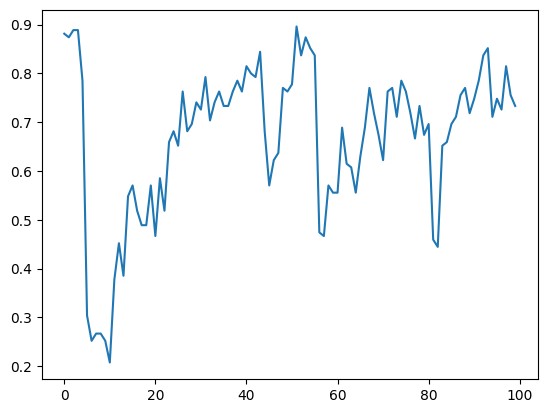

In [83]:
plt.plot(range(100),history.history['categorical_accuracy'])

In [94]:
model2=Sequential()
model2.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model2.add(LSTM(128,return_sequences=True,activation='relu'))
model2.add(LSTM(64,return_sequences=False,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(5,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [95]:
history=model2.fit(x_test,y_test,epochs=140)

Epoch 1/140
1/1 [==============================] - 7s 7s/step - loss: 1.6198 - categorical_accuracy: 0.1333
Epoch 2/140
1/1 [==============================] - 0s 134ms/step - loss: 1.6452 - categorical_accuracy: 0.1333
Epoch 3/140
1/1 [==============================] - 0s 118ms/step - loss: 12.4674 - categorical_accuracy: 0.1333
Epoch 4/140
1/1 [==============================] - 0s 116ms/step - loss: 1.6597 - categorical_accuracy: 0.1333
Epoch 5/140
1/1 [==============================] - 0s 118ms/step - loss: 2.0983 - categorical_accuracy: 0.1333
Epoch 6/140
1/1 [==============================] - 0s 116ms/step - loss: 1.6945 - categorical_accuracy: 0.2000
Epoch 7/140
1/1 [==============================] - 0s 123ms/step - loss: 1.7937 - categorical_accuracy: 0.1333
Epoch 8/140
1/1 [==============================] - 0s 126ms/step - loss: 2.0175 - categorical_accuracy: 0.2667
Epoch 9/140
1/1 [==============================] - 0s 125ms/step - loss: 5.1618 - categorical_accuracy: 0.1333
Epo

In [92]:
del model1

NameError: name 'model1' is not defined

In [99]:
model2.evaluate(x_test,y_test)

1/1 [==============================] - 1s 966ms/step - loss: 0.1122 - categorical_accuracy: 1.0000


[0.11217392235994339, 1.0]

In [93]:
del model2

NameError: name 'model2' is not defined

In [96]:
history1=model2.fit(x_test,y_test,epochs=60)

Epoch 1/60
1/1 [==============================] - 0s 122ms/step - loss: 1.1788 - categorical_accuracy: 0.6667
Epoch 2/60
1/1 [==============================] - 0s 125ms/step - loss: 1.1470 - categorical_accuracy: 0.6000
Epoch 3/60
1/1 [==============================] - 0s 117ms/step - loss: 1.1437 - categorical_accuracy: 0.6000
Epoch 4/60
1/1 [==============================] - 0s 124ms/step - loss: 1.1488 - categorical_accuracy: 0.6667
Epoch 5/60
1/1 [==============================] - 0s 113ms/step - loss: 1.0972 - categorical_accuracy: 0.7333
Epoch 6/60
1/1 [==============================] - 0s 116ms/step - loss: 1.0569 - categorical_accuracy: 0.6667
Epoch 7/60
1/1 [==============================] - 0s 138ms/step - loss: 1.0028 - categorical_accuracy: 0.7333
Epoch 8/60
1/1 [==============================] - 0s 135ms/step - loss: 0.9733 - categorical_accuracy: 0.7333
Epoch 9/60
1/1 [==============================] - 0s 192ms/step - loss: 0.9419 - categorical_accuracy: 0.6667
Epoch 10/6

In [98]:
history2=model2.fit(x_test,y_test,epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 123ms/step - loss: 0.5312 - categorical_accuracy: 0.8000
Epoch 2/50
1/1 [==============================] - 0s 132ms/step - loss: 0.3750 - categorical_accuracy: 0.8667
Epoch 3/50
1/1 [==============================] - 0s 133ms/step - loss: 2.0096 - categorical_accuracy: 0.6000
Epoch 4/50
1/1 [==============================] - 0s 119ms/step - loss: 0.6305 - categorical_accuracy: 0.8000
Epoch 5/50
1/1 [==============================] - 0s 164ms/step - loss: 1.3924 - categorical_accuracy: 0.5333
Epoch 6/50
1/1 [==============================] - 0s 142ms/step - loss: 1.7566 - categorical_accuracy: 0.7333
Epoch 7/50
1/1 [==============================] - 0s 141ms/step - loss: 0.8453 - categorical_accuracy: 0.6000
Epoch 8/50
1/1 [==============================] - 0s 130ms/step - loss: 2.6653 - categorical_accuracy: 0.6000
Epoch 9/50
1/1 [==============================] - 0s 151ms/step - loss: 0.9194 - categorical_accuracy: 0.6667
Epoch 10/5

In [122]:
predicted=model.predict(x_test)

2/2 [==============================] - 1s 47ms/step


In [123]:
predictions=[actions[np.argmax(i)] for i in predicted]
actual=[actions[np.argmax(i)] for i in y_test]

In [124]:
print(predictions)
print()
print(actual)

['please', 'thanks', 'iloveyou', 'blank', 'thanks', 'thanks', 'please', 'blank', 'iloveyou', 'thanks', 'blank', 'thanks', 'thanks', 'iloveyou', 'hello', 'iloveyou', 'blank', 'please', 'thanks', 'iloveyou', 'thanks', 'thanks', 'thanks', 'iloveyou', 'please', 'hello', 'blank', 'hello', 'blank', 'blank', 'blank', 'thanks', 'hello', 'hello', 'blank', 'blank', 'please', 'blank', 'thanks', 'thanks', 'please', 'blank', 'iloveyou', 'blank', 'hello', 'hello', 'please', 'iloveyou', 'iloveyou', 'iloveyou', 'please', 'thanks', 'iloveyou', 'hello', 'iloveyou', 'please', 'please', 'iloveyou', 'iloveyou', 'please']

['please', 'thanks', 'iloveyou', 'blank', 'thanks', 'thanks', 'please', 'blank', 'iloveyou', 'thanks', 'blank', 'thanks', 'thanks', 'iloveyou', 'hello', 'iloveyou', 'blank', 'please', 'thanks', 'iloveyou', 'thanks', 'thanks', 'thanks', 'iloveyou', 'please', 'hello', 'blank', 'hello', 'blank', 'blank', 'blank', 'thanks', 'hello', 'hello', 'blank', 'blank', 'please', 'blank', 'thanks', 'tha

In [125]:
predictions_val=[np.argmax(i) for i in predicted]
actual_val=[np.argmax(i) for i in y_test]

In [126]:
from sklearn.metrics import confusion_matrix as com
cm=com(actual_val,predictions_val)

<Axes: >

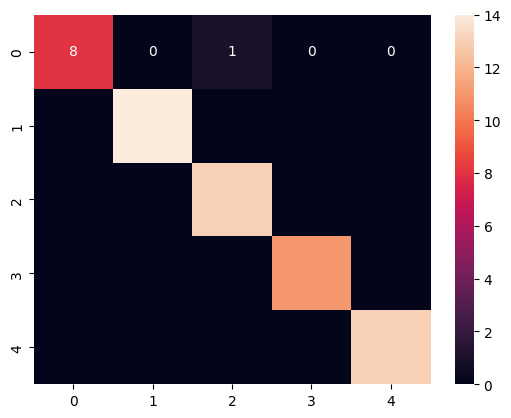

In [127]:
heatmap(cm,annot=True)

In [111]:
model2.save('asl_model2.keras')

In [128]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 2s 46ms/step - loss: 0.0795 - categorical_accuracy: 0.9833


[0.0794592797756195, 0.9833333492279053]

In [15]:
from tensorflow.keras.models import load_model

In [16]:
model=load_model('asl_model1.keras')

In [129]:
model2.evaluate(x_test,y_test)

2/2 [==============================] - 0s 59ms/step - loss: 3.2778 - categorical_accuracy: 0.4167


[3.2777726650238037, 0.4166666567325592]

In [130]:
# till now asl model1 is better

In [18]:
model

In [19]:
# real time detection

In [ ]:
'''
sentence array will contain all our predictions predicted by the model.

frames=[] is an array which will contain the extracted landmarks.
when the length of the this arrray == 30 then it will be converted to a numpy array as numpy arrays are suitable for predictions.
then frames will again be set to [] / blank.

after the frames array gets cleared 
    we are expanding the dimension of the input array as models accept batch of data.
    giving the model to predict it
    getting the first array of prediction
    out of that first array we aking the index whose probablity is more
    and then getting the action giving it as an index.

we will be creating a white image which will be rendered everytime and will contain the predicted action in text.

USER SHOULD BE 110cm or 43 inches AWAY FROM CAMERA FOR CORRECT PREDICTIONS.
'''

In [50]:
sentence=[]
frames=[]
threshold=0.7  # change acc to detections
white=cv.imread("white.png")
cap=cv.VideoCapture(0)
while cap.isOpened():
    _,frame=cap.read()
    image,results=mediapipe_process(frame,holistic)
    draw_landmarks(image,results)
    # landmarks=extract_landmarks(results)
    frames.insert(0,extract_landmarks(results))
    
    if len(frames)==30:
        x=np.array(frames)
        frames.clear()
        # res_1=actions[np.argmax(model.predict(np.expand_dims(x,0))[0])]
        res_1=model.predict(np.expand_dims(x,0))[0]  # this has the array of predictions
        # sentence.append(res)
    
    # arrangement logic of words 
        if np.max(res_1)>threshold:  # if our predicted value is greater than the threshold
            res_2=actions[np.argmax(res_1)]  #  predicted output will be stored in res_2 eg=> thanks
            if len(sentence)>0:  # if length of sentence array is greater than 0 which means there are some words present.
                if res_2!=sentence[-1]:  # if the latest outcome is not equal to the latest predicted outcome
                    sentence.append(res_2)
                
            else: # if the sentence lenght is 0 which means its the first prediction
                sentence.append(res_2) 
            
    sentence=sentence[-5:]   
    cv.putText(white,' '.join(sentence),(10,20),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,0),1,cv.LINE_AA)
    if cv.waitKey(5)==27:
        cap.release()
        cv.destroyAllWindows()
        break

    cv.imshow("frame",image)
    cv.imshow('ur_sentence',white)


1/1 [==============================] - 0s 31ms/step


In [31]:
sentence

['hello', 'hello', 'iloveyou', 'blank', 'please', 'iloveyou']

In [42]:
res_1

array([4.0627378e-03, 4.9415537e-16, 7.8519285e-03, 2.1599365e-06,
       9.8808318e-01], dtype=float32)